In [3]:
from skimage.transform import resize
from scipy.ndimage.interpolation import rotate
import matplotlib.pyplot as plt
import os
from collections import Counter
from PIL import Image
import numpy as np
import cv2
import pandas as pd
from skimage.io import imread
from sklearn.decomposition import PCA
import math

In [4]:
os.chdir(r'C:\Users\tomri\OneDrive - Imperial College London\worms\hydra\Tom\Tom\10k_Images\Masked_Images')

In [ ]:
def describe_worm(image):
    print("shape:", image.shape)
    print("unique:", np.unique(image))

In [5]:
image_names = os.listdir()[1:]
print(len(image_names))
print(image_names[100])

10010
Image0105_masks.png


In [ ]:
image_length = []
for i in image_names:
    image = Image.open(i)
    image_length.append(image.size)

dim_list = Counter(image_length)
print("#unique ", len(dim_list))
for i in image_length:
    print(i, dim_list[i])

In [ ]:
for x in range(300, 400, 10):
    print("#worms <= px:", x)
    count = 0
    for i, j in image_length:
        if i <= x:
            count +=1
    print(count)

In [ ]:
#pixel values one image
input_image = Image.open(image_names[1])
  
pix_val = list(input_image.getdata())
print(pix_val)

#values are 0 or 100

input_image = cv2.imread(image_names[1])
h, w, c = input_image.shape
print(h, w, c)
#3 channels; RGB

#binary values change from picture to picturef

In [ ]:
#check all pictures are binary

for i in image_names:
    worm = cv2.imread(i)
    if len(np.unique(worm)) != 2:
        print(i)

#all images are binary

In [ ]:
#resize all images
input_image = cv2.imread(image_names[1])
print(input_image.shape)
res = resize(input_image, (300, 300))
print(res.shape)

In [ ]:
#parse image
test_image = image_names[9010]
worm = imread(test_image)#grey scale 3 channels -> 1
describe_worm(worm)
plt.imshow(worm)
plt.show()

#min-max scale
worm = worm / np.max(worm)

#resize
worm = resize(worm, (300, 300))
worm = np.round(worm) #keep as 0. and 1. 

#check
describe_worm(worm)

#extract 

worm_coords = np.array([[x, y] for y, x in np.argwhere(worm == 1.0)])
print(worm_coords.shape)
for i in worm_coords:
    print(worm_coords[i, :])
    

pca = PCA(n_components=2)
pca.fit(worm_coords)

plt.imshow(worm)


# code stolen from: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate("", v1, v0, arrowprops=arrowprops)


# code stolen from: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

# arrow doesn't plot if the point is off-screen
plt.ylim(0, 350)
plt.xlim(0, 350)

plt.show()

In [6]:
def describe_worm(image):
    print("shape:", image.shape)
    print("unique:", np.unique(image))

def scale_resize(worm):
    """
    given a loaded png image taking binary values 
    min-max scales to take values 0 or 1
    and resizes to (300, 300)
    """
    #min-max scale
    worm = worm / np.max(worm)

    #resize
    worm = resize(worm, (300, 300))
    worm = np.round(worm) #keep as 0. and 1. 
    
    return worm 



def pca_align(worm):
    """
    take scaled-binarised worm image and
    aligns worms by first principle component
    """
    #extract x,y coordinates of the worm 
    worm_coords = np.array([[x, y] for x, y in np.argwhere(worm == 1.0)])
    #calculate first two PC
    pca = PCA(n_components=2)
    pca = pca.fit(worm_coords)
    #convert into angle 
    angle = np.arctan2(*pca.components_[0])
    #rotate image 
    rotated_img = rotate(worm,angle/math.pi*180-90, mode = 'nearest')
    
    return rotated_img

def process_single(index):
    """
    Load image by index from list of images 
    and call processing functions 
    """
    test_image = image_names[index]
    worm = imread(test_image)

    
    worm = scale_resize(worm)
    worm = pca_align(worm)
    
    return worm

def process_single_testing(index):
    """
    Load image by index from list of images 
    and call processing functions 
    """
    test_image = image_names[index]
    worm = imread(test_image)
    print("original")
    describe_worm(worm)
    plt.imshow(worm)
    plt.show()
    
    worm = scale_resize(worm)
    print("\n scaled+resized")
    describe_worm(worm)

    worm = pca_align(worm)
    print("\n PCA aligned")
    describe_worm(worm)
    plt.imshow(worm)
    plt.show()
    
    return worm


In [ ]:
worm = process_single(100)
plt.imshow(worm)
describe_worm(worm)

In [ ]:
from matplotlib import pyplot
save_path = '../r/{}'
save_path2 = '../p/{}'

for i in range(500):
    worm = process_single(i)
    plt.savefig(save_path.format(i))

    
    worm_coords = np.array([[x, y] for x, y in np.argwhere(worm == 1.0)])
    pca = PCA(n_components=2)
    pca = pca.fit(worm_coords)
    angle = np.arctan2(*pca.components_[0])
    rotated_img = rotate(worm,angle/math.pi*180-90)
    
    pyplot.imshow(worm)
    pyplot.show()
    
    pyplot.imshow(rotated_img)
    plt.savefig(save_path2.format(i))

    
    pyplot.show()

In [ ]:
worm_coords = np.array([[x, y] for y, x in np.argwhere(worm == 1.0)])
pca = PCA(n_components=2)
pca = pca.fit(worm_coords)
angle = np.arctan2(*pca.components_[0])
rotated_img = rotate(worm,angle/math.pi*180-90)
plt.imshow(rotated_img)


In [ ]:
#from pca worms, look at unique vaues
#re-biarise
worm = np.round(worm)
#aligned get coordinates
worm_coords = np.array([[x, y] for x, y in np.argwhere(worm == 1.0)])
#max mins and shift all cordinates
yt = 300 - np.max(worm_coords[:,0]) #to add to points in the first column 
xt = np.min(worm_coords[:, 1])
print(xt, yt)
#make 0 array of 300

#in a for looop go through coordinated if in coords change to 1

In [ ]:
s = worm_coords
print(s)
yt = 300 - np.max(s[:,0]) #to add to points in the first column 
print(yt)
xt = np.min(s[:, 1]) #to minus from points in second column
print(xt)

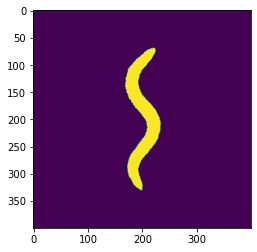

69 330
169 234
0 261
0 65


In [29]:
#how to translate worm_coords
worm = process_single(89)
worm = np.round(worm)
plt.imshow(worm)
plt.show()
worm_coords = np.array([[x, y] for x, y in np.argwhere(worm == 1.0)])
print(np.min(worm_coords[:, 0]), np.max(worm_coords[:, 0]))
print(np.min(worm_coords[:, 1]), np.max(worm_coords[:, 1]))
c2 = np.copy(worm_coords)
yt = np.min(worm_coords[:,0]) #to add to points in the first column 
xt = np.min(worm_coords[:, 1])
c2[:,0] -= yt
c2[:, 1] -= xt
print(np.min(c2[:, 0]), np.max(c2[:, 0]))
print(np.min(c2[:, 1]), np.max(c2[:, 1]))

In [30]:
print(c2)

[[  0  51]
 [  0  52]
 [  1  47]
 ...
 [260  31]
 [261  28]
 [261  30]]


In [34]:
grid = np.zeros((300, 300))
for point in worm_coords:
    grid[point[0], point[1]] = 1.0

plt.imshow(grid)
plt.show()

IndexError: index 300 is out of bounds for axis 0 with size 300

In [14]:
#check translation 
for i in range(50):
    print(worm_coords[i, :], c2[i, :], "\n")

[ 65 221] [ 50 371] 

[ 66 220] [ 51 370] 

[ 66 221] [ 51 371] 

[ 66 222] [ 51 372] 

[ 67 219] [ 52 369] 

[ 67 220] [ 52 370] 

[ 67 221] [ 52 371] 

[ 67 222] [ 52 372] 

[ 67 223] [ 52 373] 

[ 68 219] [ 53 369] 

[ 68 220] [ 53 370] 

[ 68 221] [ 53 371] 

[ 68 222] [ 53 372] 

[ 68 223] [ 53 373] 

[ 69 217] [ 54 367] 

[ 69 218] [ 54 368] 

[ 69 219] [ 54 369] 

[ 69 220] [ 54 370] 

[ 69 221] [ 54 371] 

[ 69 222] [ 54 372] 

[ 69 223] [ 54 373] 

[ 69 224] [ 54 374] 

[ 69 225] [ 54 375] 

[ 70 217] [ 55 367] 

[ 70 218] [ 55 368] 

[ 70 219] [ 55 369] 

[ 70 220] [ 55 370] 

[ 70 221] [ 55 371] 

[ 70 222] [ 55 372] 

[ 70 223] [ 55 373] 

[ 70 224] [ 55 374] 

[ 70 225] [ 55 375] 

[ 70 226] [ 55 376] 

[ 71 217] [ 56 367] 

[ 71 218] [ 56 368] 

[ 71 219] [ 56 369] 

[ 71 220] [ 56 370] 

[ 71 221] [ 56 371] 

[ 71 222] [ 56 372] 

[ 71 223] [ 56 373] 

[ 71 224] [ 56 374] 

[ 71 225] [ 56 375] 

[ 71 226] [ 56 376] 

[ 72 217] [ 57 367] 

[ 72 218] [ 57 368] 

[ 72 219] 

In [ ]:
#check all pca-aligned worms are inside 300*300
#this is acheived by originally resizesing below 213 using pythagoras 
divergents = []
for i in range(len(image_names)):
    worm = process_single(i)
    worm = np.round(worm)
    worm_coords = np.array([[x, y] for x, y in np.argwhere(worm == 1.0)])
    if np.min(worm_coords[:, 0]) <0 or np.max(worm_coords[:, 0]) > 300:
        divergents.append(image_names[i])
    if np.min(worm_coords[:, 1]) <0 or np.max(worm_coords[:, 1]) > 300:
        divergents.append(image_names[i])
print(len(divergents))
print(divergents)

In [ ]:
for i in range(50):
    worm = process_single(i)
    print(len(np.unique(worm)), "\n\n")

In [ ]:
#worm = np.round(worm)
#need to round
plt.hist(np.unique(worm))
print(np.unique(worm))

In [ ]:
plt.imshow(worm)

In [ ]:
#how to translate worm_coords
worm = process_single(9190)
worm = np.round(worm)
plt.imshow(worm)
plt.show()
worm_coords = np.array([[x, y] for x, y in np.argwhere(worm == 1.0)])
print(np.min(worm_coords[:, 0]), np.max(worm_coords[:, 0]))
print(np.min(worm_coords[:, 1]), np.max(worm_coords[:, 1]))
c2 = np.copy(worm_coords)
yt = np.min(worm_coords[:,0]) #to add to points in the first column 
xt = np.min(worm_coords[:, 1])
c2[:,0] -= yt
c2[:, 1] -= xt
print(np.min(c2[:, 0]), np.max(c2[:, 0]))
print(np.min(c2[:, 1]), np.max(c2[:, 1]))

In [ ]:
grid = np.zeros((300, 300))
for point in c2:
    grid[point[0], point[1]] = 1.0